## UFO SIGHTINGS PROJECT

Author: Rony Guerra Jr

`The purpose` of this project is to conduct exploratory data analysis (EDA).
`The goal` is to to gain insights, discover patterns, and identify relationships within the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('alien_sightings.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_1412\567025134.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('alien_sightings.csv')


In [3]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
shape = df.shape
rows = shape[0]  # Extracting the number of rows
cols = shape[1]  # Extracting the number of columns

print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 88679 rows and 11 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [6]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

In [7]:
columns_to_drop = ['duration (hours/min)', 'comments']
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.rename(columns={'duration (seconds)':'duration_in_seconds', 'date posted':'date_posted'}, inplace=True)

In [9]:
df.head()

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,1/22/2004,21.4180556,-157.803611


In [10]:
df.isnull().sum()

datetime                   0
city                       0
state                   7409
country                12365
shape                   2922
duration_in_seconds        2
date_posted                0
latitude                   0
longitude                  0
dtype: int64

In [11]:
df['shape'].fillna('unknown', inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

datetime               0
city                   0
state                  0
country                0
shape                  0
duration_in_seconds    0
date_posted            0
latitude               0
longitude              0
dtype: int64

In [14]:
df[df.duplicated()]

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude
338,10/11/1999 20:15,portville,ny,us,oval,30,10/19/1999,42.0386111,-78.341111
340,10/11/1999 20:15,portville,ny,us,oval,60,10/19/1999,42.0386111,-78.341111
830,10/1/2005 1:00,tinley park,il,us,circle,600,10/11/2005,41.5733333,-87.784444
833,10/1/2005 1:00,tinley park,il,us,triangle,0,10/11/2005,41.5733333,-87.784444
1062,10/1/2013 12:30,pittsburgh,pa,us,unknown,60,10/14/2013,40.4405556,-79.996111
...,...,...,...,...,...,...,...,...,...
86008,9/26/2012 0:41,augusta,me,us,unknown,6.0,10/30/2012,44.310556,-69.780000
86053,9/26/2013 21:30,north myrtle beach,sc,us,circle,180.0,9/30/2013,33.815833,-78.680278
86754,9/30/1968 21:00,edison,nj,us,disk,1800.0,8/7/2007,40.518611,-74.412500
86889,9/30/2005 23:00,orland park,il,us,light,2700.0,10/11/2005,41.630278,-87.853889


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df[df.duplicated()]

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude


In [17]:
df.dtypes

datetime                object
city                    object
state                   object
country                 object
shape                   object
duration_in_seconds     object
date_posted             object
latitude                object
longitude              float64
dtype: object

In [18]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [19]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [20]:
df['latitude'] = pd.to_numeric(df['latitude'])

In [21]:
df['duration_in_seconds'] = df['duration_in_seconds'].str.replace('`', '')

In [22]:
df['duration_in_seconds'] = pd.to_numeric(df['duration_in_seconds'])

In [23]:
df.dtypes

datetime               datetime64[ns]
city                           object
state                          object
country                        object
shape                          object
duration_in_seconds           float64
date_posted            datetime64[ns]
latitude                      float64
longitude                     float64
dtype: object

In [24]:
df.head()

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,2004-04-27,29.883056,-97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,2007-04-27,36.595000,-82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,1999-10-02,41.117500,-73.408333


In [25]:
df['city'] = df['city'].str.title()
df['state'] = df['state'].str.upper()
df['country'] = df['country'].str.upper()
df['shape'] = df['shape'].str.title()

In [26]:
df.head()

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude
0,1949-10-10 20:30:00,San Marcos,TX,US,Cylinder,2700.0,2004-04-27,29.883056,-97.941111
3,1956-10-10 21:00:00,Edna,TX,US,Circle,20.0,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,Light,900.0,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,Sphere,300.0,2007-04-27,36.595000,-82.188889
7,1965-10-10 23:45:00,Norwalk,CT,US,Disk,1200.0,1999-10-02,41.117500,-73.408333


In [27]:
df.to_csv('sightings_in_america.csv', index=False)

## Has there been any trend in UFO sightings over the years?

In [28]:
df.head()

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude
0,1949-10-10 20:30:00,San Marcos,TX,US,Cylinder,2700.0,2004-04-27,29.883056,-97.941111
3,1956-10-10 21:00:00,Edna,TX,US,Circle,20.0,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,Light,900.0,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,Sphere,300.0,2007-04-27,36.595000,-82.188889
7,1965-10-10 23:45:00,Norwalk,CT,US,Disk,1200.0,1999-10-02,41.117500,-73.408333


In [29]:
df['country'].value_counts()

US    70012
CA     3238
GB       12
AU       11
Name: country, dtype: int64

In [30]:
df_filtered = df[df['country'] == 'US']

In [31]:
df_filtered.head()

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude
0,1949-10-10 20:30:00,San Marcos,TX,US,Cylinder,2700.0,2004-04-27,29.883056,-97.941111
3,1956-10-10 21:00:00,Edna,TX,US,Circle,20.0,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,Light,900.0,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,Sphere,300.0,2007-04-27,36.595000,-82.188889
7,1965-10-10 23:45:00,Norwalk,CT,US,Disk,1200.0,1999-10-02,41.117500,-73.408333


In [32]:
df_filtered = df[(df['datetime'].dt.year != 2014) & (df['date_posted'].dt.year != 2014)]

In [33]:
df_filtered['year_sighting'] = df_filtered['datetime'].dt.year

C:\Users\User\AppData\Local\Temp\ipykernel_1412\6112811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_sighting'] = df_filtered['datetime'].dt.year


In [34]:
df_filtered['year_posted'] = df_filtered['date_posted'].dt.year

C:\Users\User\AppData\Local\Temp\ipykernel_1412\3756081213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_posted'] = df_filtered['date_posted'].dt.year


In [35]:
df_filtered.describe()

,duration_in_seconds,latitude,longitude,year_sighting,year_posted
count,5.121900e+04,70389.000000,70389.000000,70389.000000,70389.000000
mean,4.803147e+03,38.781977,-95.411109,2003.686570,2006.835102
std,3.810439e+05,5.823237,18.457522,10.308617,4.450726
min,0.000000e+00,-37.813938,-176.658056,1910.000000,1998.000000
25%,1.500000e+01,34.236944,-114.460000,2001.000000,2003.000000
50%,1.200000e+02,39.329167,-89.829444,2006.000000,2007.000000
75%,6.000000e+02,42.391667,-80.569444,2011.000000,2011.000000
max,8.280000e+07,72.700000,153.099533,2013.000000,2013.000000


In [36]:
# Group sightings by year and count the number of sightings
sightings_by_year = df_filtered.groupby('year_sighting').size()

# Group sightings by year posted and count the number of sightings
sightings_by_year_posted = df_filtered.groupby('year_posted').size()

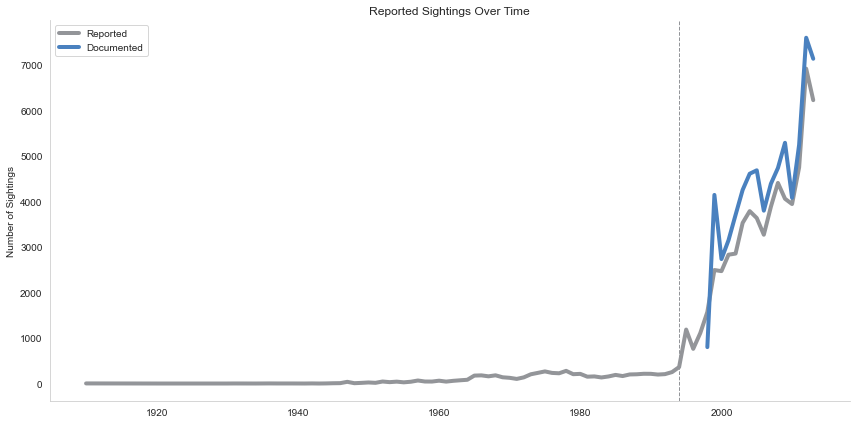

In [37]:
# Plotting
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(12, 6))
sns.lineplot(data=sightings_by_year, x=sightings_by_year.index, y=sightings_by_year.values, color='#939599', label='Reported', linewidth=4)
sns.lineplot(data=sightings_by_year_posted, x=sightings_by_year_posted.index, y=sightings_by_year_posted.values, color='#4A81BF', label='Documented', linewidth=4)
plt.axvline(x=1994, linestyle='--', color='#939599', linewidth=1)
plt.title('Reported Sightings Over Time')
plt.xlabel('')
plt.ylabel('Number of Sightings')
plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

## Do certain seasons or times of year have more UFO sightings?

In [38]:
df_filtered.head()

,datetime,city,state,country,shape,duration_in_seconds,date_posted,latitude,longitude,year_sighting,year_posted
0,1949-10-10 20:30:00,San Marcos,TX,US,Cylinder,2700.0,2004-04-27,29.883056,-97.941111,1949,2004
3,1956-10-10 21:00:00,Edna,TX,US,Circle,20.0,2004-01-17,28.978333,-96.645833,1956,2004
4,1960-10-10 20:00:00,Kaneohe,HI,US,Light,900.0,2004-01-22,21.418056,-157.803611,1960,2004
5,1961-10-10 19:00:00,Bristol,TN,US,Sphere,300.0,2007-04-27,36.595000,-82.188889,1961,2007
7,1965-10-10 23:45:00,Norwalk,CT,US,Disk,1200.0,1999-10-02,41.117500,-73.408333,1965,1999


In [39]:
df_filtered['month_name'] = df_filtered['datetime'].dt.strftime('%b')

C:\Users\User\AppData\Local\Temp\ipykernel_1412\710426897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_name'] = df_filtered['datetime'].dt.strftime('%b')


In [40]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_count = df_filtered.groupby('month_name').size().sort_index(ascending=True)
# Reindex the resulting Series using the custom month order
month_count = month_count.reindex(month_order).reset_index().rename(columns={'month_name':'month', 0:'count'})

In [41]:
month_count

,month,count
0,Jan,4540
1,Feb,3803
2,Mar,4530
3,Apr,4450
4,May,4676
5,Jun,7240
6,Jul,8554
7,Aug,7736
8,Sep,6948
9,Oct,6892


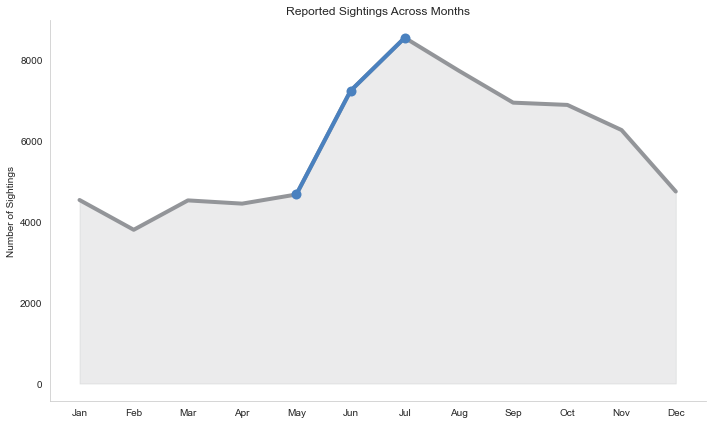

In [42]:
# Plotting
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_count, x='month', y='count', color='#939599', linewidth=4)
plt.fill_between(month_count['month'], month_count['count'], color="#BDBFC1", alpha=0.3)
# Lineplot for May to July with specified color and markers
sns.lineplot(data=month_count[4:7], x='month', y='count', color='#4A81BF', marker='o', markersize=10, markeredgewidth=0, linewidth=4)
plt.title('Reported Sightings Across Months')
plt.xlabel('')
plt.ylabel('Number of Sightings')
sns.despine(top=True, right=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## What specific dates within July witness the highest concentration of UFO sightings, driving the peak in activity?

In [43]:
# Extract the day from the 'date_time' column
df_filtered['day'] = df_filtered['datetime'].dt.day

# Filter the data by month of July
july_data = df_filtered[df_filtered['month_name'] == 'Jul']

# Group by day and count the sightings
july_count = july_data.groupby('day').size().reset_index().rename(columns={0:'count'})

C:\Users\User\AppData\Local\Temp\ipykernel_1412\1429725973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day'] = df_filtered['datetime'].dt.day


In [44]:
july_count

,day,count
0,1,508
1,2,193
2,3,329
3,4,1127
4,5,269
5,6,249
6,7,307
7,8,176
8,9,195
9,10,267


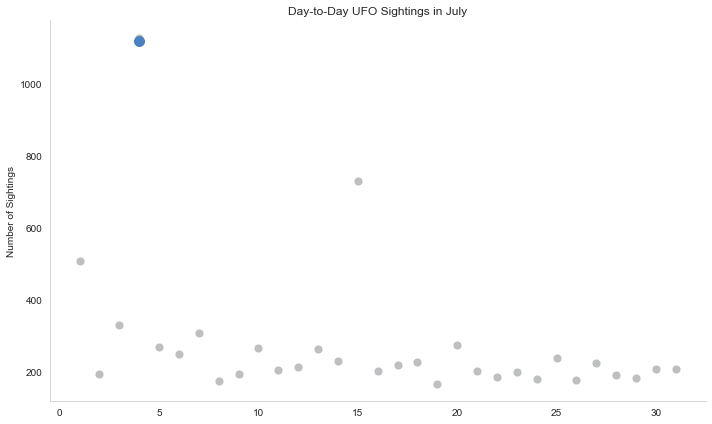

In [45]:
# Plotting
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=july_count, x='day', y='count', color='#BDBFC1', s=80)
plt.scatter(x=4, y=1117, color='#4A81BF', s=100)  # July 4th data point

plt.title('Day-to-Day UFO Sightings in July')
plt.xlabel('')
plt.ylabel('Number of Sightings')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

## What is the distribution of UFO sightings across different hours of the day?

In [46]:
# Extract the hour from the 'date_time' column
df_filtered['hour'] = df_filtered['datetime'].dt.hour
# Group by day and count the sightings
hour_count = df_filtered.groupby('hour').size().reset_index().rename(columns={0:'count'})

C:\Users\User\AppData\Local\Temp\ipykernel_1412\3623058614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['datetime'].dt.hour


In [47]:
hour_count

,hour,count
0,0,4303
1,1,2823
2,2,2021
3,3,1726
4,4,1335
5,5,1446
6,6,1058
7,7,828
8,8,724
9,9,896


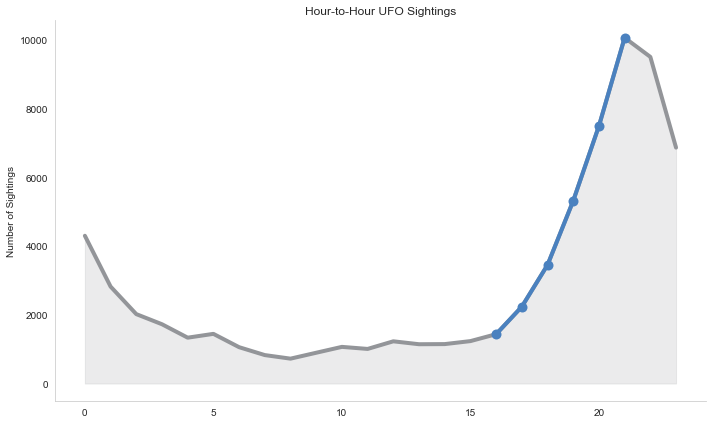

In [48]:
# Plotting
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_count, x='hour', y='count', color='#939599', linewidth=4)
plt.fill_between(hour_count['hour'], hour_count['count'], color="#BDBFC1", alpha=0.3)
# Lineplot for May to July
sns.lineplot(data=hour_count[16:22], x='hour', y='count', color='#4A81BF', marker='o', markersize=10, markeredgewidth=0, linewidth=4)
plt.title('Hour-to-Hour UFO Sightings')
plt.xlabel('')
plt.ylabel('Number of Sightings')
sns.despine(top=True, right=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Are there any geographical patterns in UFO sightings?

In [49]:
state_counts = df_filtered['state'].value_counts().reset_index().rename(columns={'index':'state', 'state':'count'}).head(10)

In [50]:
state_counts

,state,count
0,CA,9160
1,WA,4141
2,FL,3834
3,TX,3635
4,NY,3141
5,IL,2638
6,AZ,2482
7,PA,2412
8,OH,2367
9,MI,1921


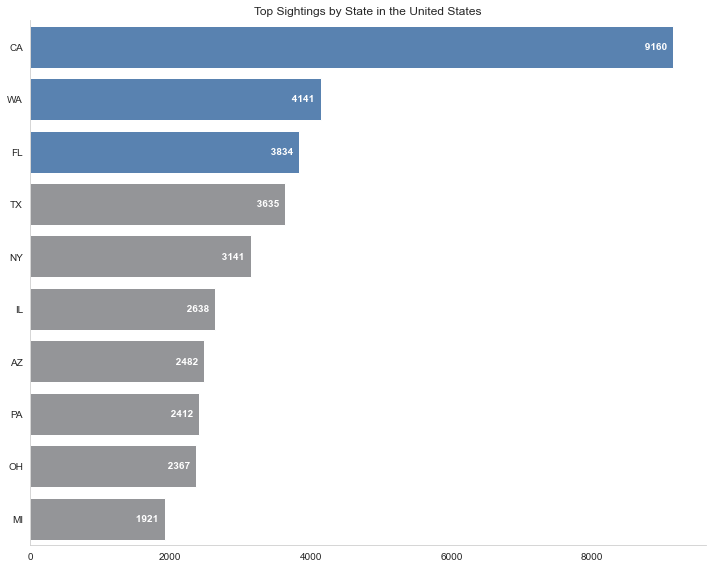

In [51]:
# Plotting 
colors = ['#4A81BF' if i < 3 else '#939599' for i in range(len(state_counts['state']))]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=state_counts, x='count', y='state', palette=colors)

# Add data values inside the end of the bars
for i, count in enumerate(state_counts['count']):
    ax.text(count - 450, i, f' {count}', va='center', color='white', weight='bold')
    
plt.xlabel('')
plt.ylabel('')
plt.title('Top Sightings by State in the United States')
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

## What are the most commonly reported shapes of UFOs?

In [52]:
common_shapes = df_filtered['shape'].value_counts().reset_index().rename(columns={'index':'shape','shape':'count'})

In [53]:
common_shapes = common_shapes.sort_values('count', ascending=False).head(10)

In [54]:
common_shapes

,shape,count
0,Light,14324
1,Unknown,7311
2,Triangle,6941
3,Circle,6572
4,Fireball,5306
5,Other,4914
6,Disk,4621
7,Sphere,4494
8,Oval,3267
9,Formation,2097


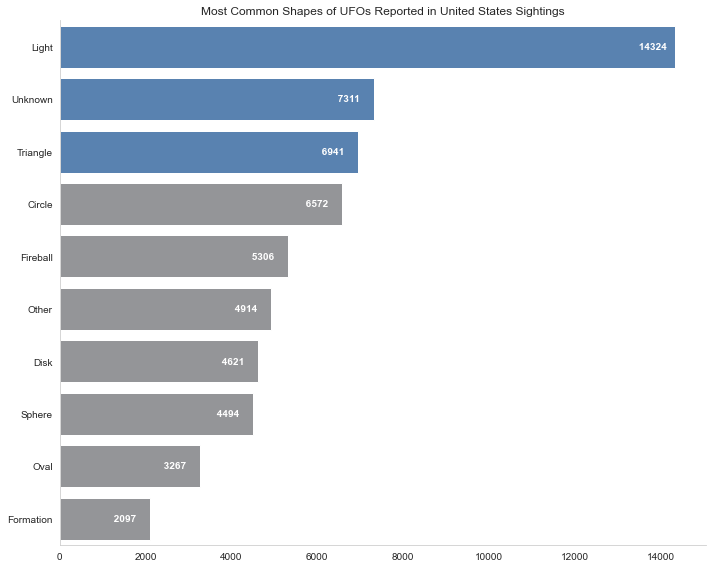

In [55]:
# Plotting 
colors = ['#4A81BF' if i < 3 else '#939599' for i in range(len(common_shapes['shape']))]
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=common_shapes, x='count', y='shape', palette=colors)

# Add data values inside the end of the bars
for i, count in enumerate(common_shapes['count']):
    ax.text(count - 900, i, f' {count}', va='center', color='white', weight='bold')
    
plt.xlabel('')
plt.ylabel('')
plt.title('Most Common Shapes of UFOs Reported in United States Sightings')
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()